In [33]:
import numpy as np
import faiss
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from PIL import Image

In [12]:
filenames = pickle.load(open('pickle/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('pickle/features-caltech101-resnet.pickle', 'rb'))

In [13]:
num_feature_dimensions=200     
pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)
feature_list_compressed = pca.transform(feature_list)
feature_list_compressed = feature_list_compressed.astype(np.float32)

In [14]:
len(feature_list_compressed), len(feature_list_compressed[0])

(9144, 200)

In [15]:
index = faiss.IndexFlatL2(num_feature_dimensions)  
print(index.is_trained)
index.add(feature_list_compressed)                 
print(index.ntotal)

True
9144


In [50]:
num_neighbors = 5
query = feature_list_compressed[99].reshape(1, -1)
distances, indices = index.search(query, num_neighbors)

print(f"Distances: ", distances)
print(f"Index: ", indices)

Distances:  [[0.         0.30231658 0.31015068 0.31589505 0.3197241 ]]
Index:  [[  99 7069 7097 7085 7105]]


In [51]:
def show_neighbors(distances, indices):
    num_images = len(indices[0])
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        idx = indices[0][i]
        distance = distances[0][i]
        image = Image.open(filenames[idx]).convert('RGB')

        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f"Dist: {distance:.2f}\nIdx: {idx}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


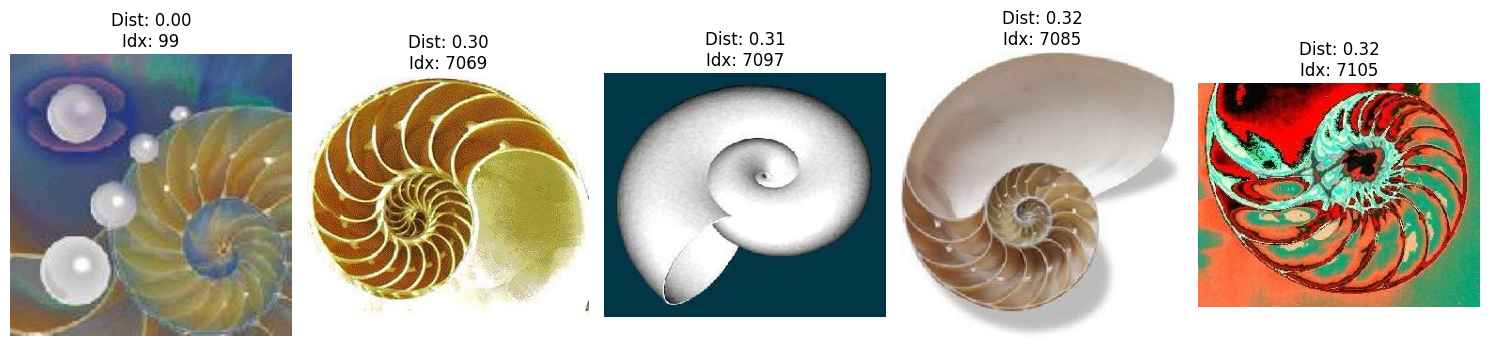

In [52]:
show_neighbors(distances, indices)